#Falcon Heavy Test Flight Data Analysis
![official insignia](https://upload.wikimedia.org/wikipedia/en/e/eb/Falcon_Heavy_test_flight.png)

Hey there!! I am [Mark Madhukar](https://github.com/programmer2215) Today I'm Going to make a basic analysis of the telemetry data of the legendary [Falcon Heavy Demo 1](https://en.wikipedia.org/wiki/Falcon_Heavy_test_flight) flight. 

A Huge Thank you to:

***DATA SOURCE***: [shahar603](https://github.com/shahar603/Telemetry-Data)

Firstly lets get the data that we need from github. 

**Note: i'm cloning a forked version of the original repository, feel free to clone the repo from the original source sited at the introduction**

In [ ]:
!git clone https://github.com/programmer2215/Telemetry-Data.git

Cloning into 'Telemetry-Data'...
remote: Enumerating objects: 2414, done.
remote: Total 2414 (delta 0), reused 0 (delta 0), pack-reused 2414
Receiving objects: 100% (2414/2414), 201.12 MiB | 29.13 MiB/s, done.
Resolving deltas: 100% (757/757), done.
Checking out files: 100% (1488/1488), done.


In [ ]:
import os

In [ ]:
os.chdir('/content/Telemetry-Data/Falcon Heavy Demo 1/Excel')

In [ ]:
!ls

 analysed.xlsx	 events.xlsx  'Falcon Heavy Demo 1 raw.xlsx'  'stage2 raw.xlsx'


as you can see we have all the required data files.

Here's a flight timeline given by wikipedia:

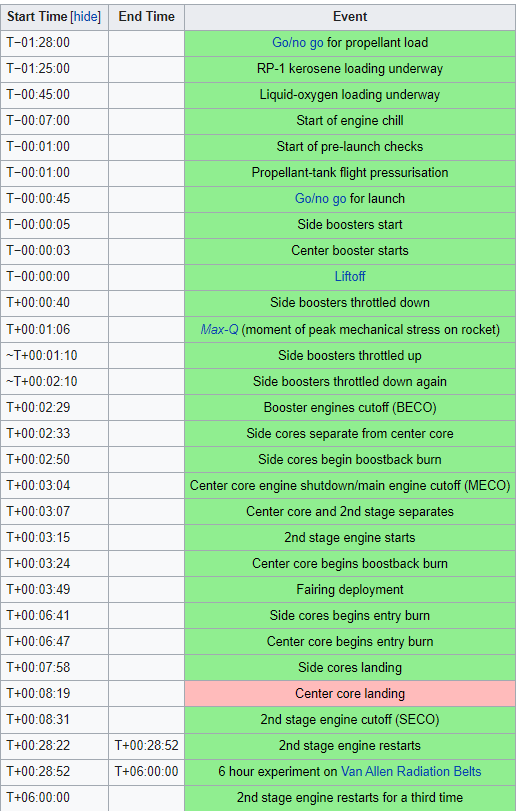

In [ ]:
import pandas as pd

In [ ]:
raw_flight_data = pd.read_excel('Falcon Heavy Demo 1 raw.xlsx')

In [ ]:
raw_flight_data

,time,velocity,altitude
0,0.000,0.000,0.0
1,0.000,0.277,0.0
2,0.033,0.277,0.0
3,0.066,0.000,0.0
4,0.100,0.000,0.0
...,...,...,...
15811,528.332,7389.722,179.0
15812,528.366,7389.722,179.0
15813,528.399,7389.722,179.0
15814,528.432,7389.722,179.0


In [ ]:
raw_flight_data[(raw_flight_data.time >= 184.0) & (raw_flight_data.time <= 185.0)] 
raw_flight_data[(raw_flight_data.time >= 511.0) & (raw_flight_data.time <= 511.1)] 

,time,velocity,altitude
15292,511.032,7376.666,179.0
15293,511.066,7377.222,179.0
15294,511.099,7377.777,179.0


In [ ]:
meco_time = raw_flight_data.at[5530, 'time']
meco_alt =  raw_flight_data.at[5530, 'altitude']
seco_time = raw_flight_data.at[15292, 'time']
seco_alt =  raw_flight_data.at[15292, 'altitude']
print(f'MECO Time: T+ {int(meco_time / 60)} mins {((meco_time / 60 ) - int(meco_time / 60)) * 60} secs')
print(f'MECO Altitude: {meco_alt} Km')
print(f'SECO Time: T+ {int(seco_time / 60)} mins {((seco_time / 60 ) - int(seco_time / 60)) * 60} secs')
print(f'SECO Altitude: {seco_alt} Km')

MECO Time: T+ 3 mins 4.4649999999999945 secs
MECO Altitude: 85.8 Km
SECO Time: T+ 8 mins 31.03199999999994 secs
SECO Altitude: 179.0 Km


As we can see the second engine cutoff took place during **T+ 8 mins 28 secs**

Now lets plot the data on a graph

In [ ]:
raw_flight_data['velocity'].max()

7389.722

In [ ]:
from matplotlib import pyplot as plt

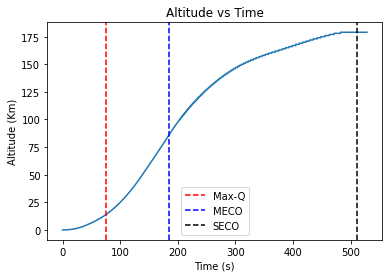

In [ ]:
plt.plot(raw_flight_data['time'], raw_flight_data['altitude'])
plt.axvline(x=76, color='r', label='Max-Q', ls='--')
plt.axvline(x=meco_time, color='b', label='MECO', ls='--')
plt.axvline(x=seco_time, color='k', label='SECO', ls='--')
plt.title('Altitude vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (Km)')
plt.legend()
plt.show()

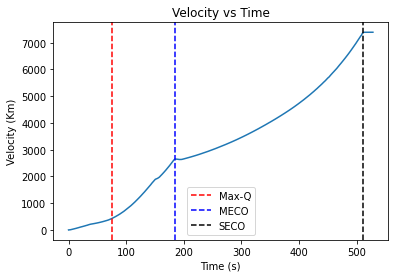

In [ ]:
plt.plot(raw_flight_data['time'], raw_flight_data['velocity'])
plt.axvline(x=76, color='r', label='Max-Q', ls='--')
plt.axvline(x=184, color='b', label='MECO', ls='--')
plt.axvline(x=seco_time, color='k', label='SECO', ls='--')
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (Km)')
plt.legend()
plt.show()

In [ ]:
analysed_df = pd.read_excel('analysed.xlsx')

In [ ]:
analysed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                519 non-null    int64  
 1   velocity            519 non-null    float64
 2   altitude            519 non-null    float64
 3   velocity_y          519 non-null    float64
 4   velocity_x          519 non-null    float64
 5   acceleration        519 non-null    float64
 6   downrange_distance  519 non-null    float64
 7   angle               519 non-null    float64
 8   q                   519 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 36.6 KB


Here's some basic info about the kind of data that is held by `analysed.xlsx`, for example the column names, the count of the total non-null values in each column, and the datatype of each column

In [ ]:
analysed_df.sample(5)

,time,velocity,altitude,velocity_y,velocity_x,acceleration,downrange_distance,angle,q
236,236,2890.841,119.822,541.435,2840.158,9.265,276.399,10.723,0.000000
177,177,2449.191,79.701,794.829,2317.328,30.507,121.993,18.997,0.000000
87,87,566.961,18.618,432.092,360.060,20.592,8.708,50.901,19384.684715
235,235,2883.619,119.281,544.506,2831.687,9.250,273.563,10.822,0.000000
400,400,4730.294,166.694,170.706,4727.694,16.200,881.177,2.062,0.000000


In [ ]:
max_q_data = analysed_df[analysed_df.q == analysed_df.q.max()]
print(f'''maximum dynamic presssure Experienced by Falcon Heavy:
Max-Q: {round(float(max_q_data['q']), 2)} Pa
time: {(int(max_q_data['time']))} s''')

maximum dynamic presssure Experienced by Falcon Heavy:
Max-Q: 23236.46 Pa
time: 76 s


our data tells us that Falcon Heavy experienced a [Max-Q](https://en.wikipedia.org/wiki/Max_q) of `23236.46 Pa` or `0.23 ATM`, and our data source suggests that the rocket experienced Max-Q at `T+ 76 secs` from Launch time.

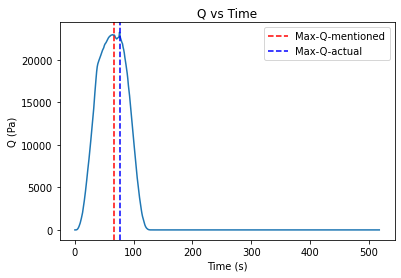

In [ ]:
plt.plot(analysed_df['time'], analysed_df['q'])
plt.axvline(x=66, color='r', label='Max-Q-mentioned', ls='--')
plt.axvline(x=76, color='b', label='Max-Q-actual', ls='--')
plt.title('Q vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Q (Pa)')
plt.legend()
plt.show()

this graph shows the [Max-Q](https://en.wikipedia.org/wiki/Max_q) experienced by Falcon Heavy. As you can see there is a slight discrepency between the flight data and the timeline on when the event took place.